# **Crawling Data Twitter**

Crawling data adalah sebuah proses pengambilan data dari suatu sumber internet. Dalam hal ini saya mencrawling data dari twitter menggunakan twint. Data yang saya peroleh adalah sebanyak 80 data. Data tersebut saya saring sehingga menjadi 79 data karena terdapat beberapa data yang tidak penting. Data tersebut merupakan tweet dari tanggal 19-09-2022 sampai 21-09-2022.



In [ ]:
%%capture
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!pip3 install . -r requirements.txt

In [ ]:
%%capture
!pip install nest-asyncio #install library nest-asyncio

In [ ]:
%%capture
!pip install aiohttp==3.7.0 #install aiohttp

### **Twint**

Twint adalah alat scraping data Twitter yang canggih ditulis dengan Python yang memungkinkan untuk scrapping Tweet dari profil Twitter tanpa menggunakan API Twitter. Twint menggunakan operator pencarian Twitter untuk scrapping Tweet dari pengguna tertentu, scrapping Tweet yang berkaitan dengan topik tertentu, tagar & tren, atau memilah informasi sensitif dari Tweet seperti email dan nomor telepon.

In [ ]:
import nest_asyncio # import nest_asyncio
nest_asyncio.apply() #digunakan sekali untuk mengaktifkan tindakan serentak dalam notebook jupyter.
import twint #untuk import twint

### **Hasil Crawling Data Twitter**

In [ ]:
c = twint.Config() #membuat variable c
c.Search = 'prabowo' #key word untuk data
c.Pandas = True
c.Limit = 80 #mencrawl 80 data
twint.run.Search(c) #run

1581829358481682432 2022-10-17 02:08:02 +0000 <Market5tudio> @VIVAcoid Sebaiknya Om prabowo mundur lebih elegant @Gerindra @sandiuno
1581829329600000001 2022-10-17 02:07:55 +0000 <Khojan7> @Mars_Sahsa @Dahnilanzar @prabowo Kita rakyat waras sangat paham klo Prabowo berjiwa besar,apa yg bisa di perbuat untuk negri ini tetap utuh pasti di lakukan.  Kita juga paham mengapa ambil bagian di pemerintahan jadi menhan,karna tau perang dunia lll pasti terjadi atas kajian2 yg di dapat.  2024 ANIES-PRABOWO
1581829142894751745 2022-10-17 02:07:11 +0000 <Reilly_Prabowo> @Raff_eth @alienfrens @CriminalDonkeys @JaNessiepoo @Burpss88 @GregoriusGerar7
1581829127308718080 2022-10-17 02:07:07 +0000 <Mas_Jack____> @BecengAparat @Ronnie_Rusli @prabowo Kalah 2 x pst depresi berat
1581829097248161792 2022-10-17 02:07:00 +0000 <eliya_hajid> Selamat mengulang waktu Jendral @prabowo wish u all the best!! Setia Waspada.
1581829056495964162 2022-10-17 02:06:50 +0000 <ariansyahp2> Puluhan seniman, budayawan dan pr

In [ ]:
Tweets_df = twint.storage.panda.Tweets_df
Tweets_df["tweet"].to_csv("prabowo.csv") #menyimpan ke prabowo.csv

## **Preposesing**

Preprocessing adalah tahap untuk "membersihkan data". data - data tersebut dibersihkan sehingga menjadi data yang bagus untuk diolah.

In [ ]:
%%capture
!pip install numpy #untuk install numpy

In [ ]:
%%capture
!pip install pandas #untuk install pandas

In [ ]:
%%capture
!pip install nltk #untuk install nltk

In [ ]:
%%capture
!pip install scikit-learn #untuk install scikit-learn

### **Import Library yang digunakan**



In [ ]:
import numpy as np #import numpy
#Library untuk mengelola data dalam Dataframe
import pandas as pd

#Lbrary untuk Preprocessing
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize # tokenizing

#Untuk membuat vektor dan TFIDF
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer

#Untuk melakukan proses SVD
from sklearn.decomposition import TruncatedSVD

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### **Import Data Dari Github**

In [ ]:
Tweets_df = pd.read_csv("https://raw.githubusercontent.com/maulidhan190081/file/main/prabowo2.csv") #mengambil data dari link

Tweets_df #print data

,tweet,label
0,Doa para kiai sepuh untuk Cak Imin dan Prabowo...,pro
1,Menteri Pertahanan (Menhan) Prabowo Subianto m...,pro
2,Semangat Juang #Ir_soekarno Ada Pada diri #pra...,pro
3,Negarawan sejati yang selalu ingin membawa ked...,pro
4,"""Zulfan Lindan bicara soal kepentingan negara ...",kontra
...,...,...
96,Masyarakat antusias menyambut kedatangan mente...,pro
97,"Anies Siap Maju di Pilpres 2024, Wagub Tak aka...",pro
98,Adian Napitupulu Sebut Presiden Jokowi Tidak A...,kontra
99,Elit Gerindra Desak Sandiaga Uno Mundur dari P...,kontra


### **Mengecilkan Semua Huruf**

In [ ]:
Tweets_df['tweet']=Tweets_df['tweet'].str.replace(',', '') #menghilangkan koma
Tweets_df['tweet']=Tweets_df['tweet'].str.lower() #mengecilkan huruf
Tweets_df['tweet'] #print data kolom tweet

0      doa para kiai sepuh untuk cak imin dan prabowo...
1      menteri pertahanan (menhan) prabowo subianto m...
2      semangat juang #ir_soekarno ada pada diri #pra...
3      negarawan sejati yang selalu ingin membawa ked...
4      "zulfan lindan bicara soal kepentingan negara ...
                             ...                        
96     masyarakat antusias menyambut kedatangan mente...
97     anies siap maju di pilpres 2024 wagub tak akan...
98     adian napitupulu sebut presiden jokowi tidak a...
99     elit gerindra desak sandiaga uno mundur dari p...
100    buah duku buah kedondong 2024 gue prabowo dong...
Name: tweet, Length: 101, dtype: object

In [ ]:
#Untuk menghapus angka
import re

#Untuk menghilangkan Punctuation
import string

## **Menghilangkan karakter spesial**

In [ ]:
def remove_PTA_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
Tweets_df['tweet'] =Tweets_df['tweet'].apply(remove_PTA_special)

## **Menghilangkan Angka**

In [ ]:
#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

Tweets_df['tweet'] = Tweets_df['tweet'].apply(remove_number)

## **Menghilangkan Tanda Baca**

In [ ]:
#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

Tweets_df['tweet'] = Tweets_df['tweet'].apply(remove_punctuation)

## **Menghilangkan Spasi Di Awal dan Akhir**

In [ ]:
#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

Tweets_df['tweet'] = Tweets_df['tweet'].apply(remove_whitespace_LT)

## **Menjadikan 1 spasi**

In [ ]:
#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

Tweets_df['tweet'] = Tweets_df['tweet'].apply(remove_whitespace_multiple)

## **Menghapus Char**

In [ ]:
# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

Tweets_df['tweet'] = Tweets_df['tweet'].apply(remove_singl_char)

## **Word Tokenize**

In [ ]:
# NLTK word tokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

Tweets_df['tweet'] = Tweets_df['tweet'].apply(word_tokenize_wrapper)
Tweets_df['tweet']

0      [doa, para, kiai, sepuh, untuk, cak, imin, dan...
1      [menteri, pertahanan, menhan, prabowo, subiant...
2           [semangat, juang, soekarno, ada, pada, diri]
3      [negarawan, sejati, yang, selalu, ingin, memba...
4      [zulfan, lindan, bicara, soal, kepentingan, ne...
                             ...                        
96     [masyarakat, antusias, menyambut, kedatangan, ...
97     [anies, siap, maju, di, pilpres, wagub, tak, a...
98     [adian, napitupulu, sebut, presiden, jokowi, t...
99     [elit, gerindra, desak, sandiaga, uno, mundur,...
100    [buah, duku, buah, kedondong, gue, prabowo, do...
Name: tweet, Length: 101, dtype: object

## **Stopwords**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Mendapatkan stopword indonesia
list_stopwords = stopwords.words('indonesian')

#Menghapus Stopword dari list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]
Tweets_df['tweet'] = Tweets_df['tweet'].apply(stopwords_removal)

Tweets_df['tweet']

0      [doa, kiai, sepuh, cak, imin, prabowo, amin, y...
1      [menteri, pertahanan, menhan, prabowo, subiant...
2                            [semangat, juang, soekarno]
3                [negarawan, sejati, membawa, kedamaian]
4      [zulfan, lindan, bicara, kepentingan, negara, ...
                             ...                        
96     [masyarakat, antusias, menyambut, kedatangan, ...
97     [anies, maju, pilpres, wagub, dukung, riza, pa...
98     [adian, napitupulu, presiden, jokowi, maju, pe...
99     [elit, gerindra, desak, sandiaga, uno, mundur,...
100    [buah, duku, buah, kedondong, gue, prabowo, ge...
Name: tweet, Length: 101, dtype: object

In [ ]:
Tweets_df.to_csv('TextPreprocessing.csv')

In [ ]:
dataTextPre = pd.read_csv('TextPreprocessing.csv')
vectorizer = CountVectorizer(min_df=1)
bag = vectorizer.fit_transform(dataTextPre['tweet'])

## **TF (Term Frekuensi)**

### **TF Keseluruhan**

In [ ]:
listkata = []
for tweet in Tweets_df['tweet']:
    listkata = listkata + str(tweet).split()

listkata_nodup = list(dict.fromkeys(listkata))
hasil_hitung = {}
for test1 in listkata_nodup:
    jumlah = 0
    for test2 in range(len(listkata)):
        if test1 == listkata[test2]:
            jumlah+=1
    hasil_hitung.update({'%s'%test1 : jumlah})
    
hasil_hitung = dict(sorted(hasil_hitung.items(), key=lambda item: item[1], reverse=True))
print(hasil_hitung)

{"'prabowo',": 40, "'presiden',": 14, "'gerindra',": 14, "'jokowi',": 12, "'subianto',": 11, "['prabowo',": 10, "'pertahanan',": 9, "'airlangga',": 8, "'menhan',": 7, "'indonesia',": 7, "'joko',": 6, "'widodo',": 6, "'negara',": 6, "'bangsa',": 6, "'dewan',": 6, "'capres',": 5, "'rakyat',": 5, "'calon',": 5, "'maju',": 5, "'rakyat']": 5, "'pilpres',": 4, "'tni',": 4, "'ri',": 4, "'membahas',": 4, "'wakil',": 4, "'negeri',": 4, "'hartarto',": 4, "'dukung',": 4, "['wakil',": 4, "'ketua',": 4, "'partai',": 4, "'pilpres']": 4, "'global',": 4, "'biaya',": 4, "'ya',": 3, "['menteri',": 3, "'jokowi']": 3, "'kompak',": 3, "'rapat',": 3, "'hati',": 3, "'presiden']": 3, "'anies',": 3, "'sosok',": 3, "'orang',": 3, "'anak',": 3, "'sesuai',": 3, "'dudung',": 3, "'prabowo']": 3, "'golkar',": 3, "'jenderal',": 3, "'nya',": 3, "'pangan',": 3, "'meningkatkan',": 3, "'ketahanan',": 3, "'hrt',": 3, "'id']": 3, "'ganjar',": 3, "'dpp',": 3, "'selengkapnya',": 3, "'sumber',": 3, "'gus',": 3, "'menteri',": 

### **TF per tweet**

In [ ]:
def terms(dataframe):
# pd.options.mode.chained_assignment = None
# pd.options.display.max_colwidth = None
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

  df3 = dataframe.copy()
  a = 1
  for inter in range(len(df3['tweet'])):
      for fitur in hasil_hitung:
          df3['%s'%(fitur)] = 0
          a+=1

  for inter in range(len(df3['tweet'])):
    for fitur in hasil_hitung:
        cek = df3['tweet'][inter]
        jumlah = 0
        for iter2 in range(len(cek)):
          if fitur == cek[iter2]:
            jumlah+=1
        df3['%s'%fitur][inter] = jumlah
        a+=1
  df3.to_csv(r'my_data.csv', index=False)
  return df3
terms(Tweets_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,tweet,label,"'prabowo',","'presiden',","'gerindra',","'jokowi',","'subianto',","['prabowo',","'pertahanan',","'airlangga',",...,'periode'],"['elit',","'desak',","'mundur',","['buah',","'duku',","'buah',","'kedondong',","'gue',",'gerindra']
0,"[doa, kiai, sepuh, cak, imin, prabowo, amin, y...",pro,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[menteri, pertahanan, menhan, prabowo, subiant...",pro,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[semangat, juang, soekarno]",pro,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[negarawan, sejati, membawa, kedamaian]",pro,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[zulfan, lindan, bicara, kepentingan, negara, ...",kontra,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,"[masyarakat, antusias, menyambut, kedatangan, ...",pro,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,"[anies, maju, pilpres, wagub, dukung, riza, pa...",pro,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,"[adian, napitupulu, presiden, jokowi, maju, pe...",kontra,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,"[elit, gerindra, desak, sandiaga, uno, mundur,...",kontra,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Seleksi Fitur Information Gain**

### **Training Data**

In [ ]:
df4 = pd.read_csv('my_data.csv')
df4['label'].unique()

array(['pro', 'kontra'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df4.drop(labels=['label','tweet'], axis=1),
    df4['label'],
    test_size=0.3,
    random_state=0)
y_train

80       pro
91    kontra
68    kontra
51    kontra
27       pro
       ...  
97       pro
67    kontra
64    kontra
47       pro
44    kontra
Name: label, Length: 70, dtype: object

### **Seleksi Fitur**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.00000000e+00, 0.00000000e+00, 1.38078107e-02, 3.91351479e-02,
       4.69788287e-02, 0.00000000e+00, 4.65211929e-02, 3.00781137e-02,
       1.02608627e-01, 0.00000000e+00, 2.86322506e-02, 0.00000000e+00,
       0.00000000e+00, 4.16021759e-02, 1.27887301e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.93669781e-02, 0.00000000e+00,
       0.00000000e+00, 1.03703999e-01, 8.70447732e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.47747188e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.07114471e-02,
       0.00000000e+00, 4.18147882e-02, 0.00000000e+00, 1.02634953e-01,
       0.00000000e+00, 0.00000000e+00, 2.34044031e-02, 0.00000000e+00,
       3.46481013e-02, 0.00000000e+00, 0.00000000e+00, 9.33584643e-02,
       2.35463900e-02, 3.68792476e-02, 0.00000000e+00, 0.00000000e+00,
       5.75082651e-03, 8.19924527e-03, 5.03842485e-02, 0.00000000e+00,
       0.00000000e+00, 6.59931742e-03, 2.08573129e-01, 0.00000000e+00,
      

### **Perangkingan**

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)
tetdf = pd.DataFrame(mutual_info)
tetdf

,0
"'prabowo',",0.000000
"'presiden',",0.000000
"'gerindra',",0.013808
"'jokowi',",0.039135
"'subianto',",0.046979
...,...
"'duku',",0.012419
"'buah',",0.000000
"'kedondong',",0.091696
"'gue',",0.000000


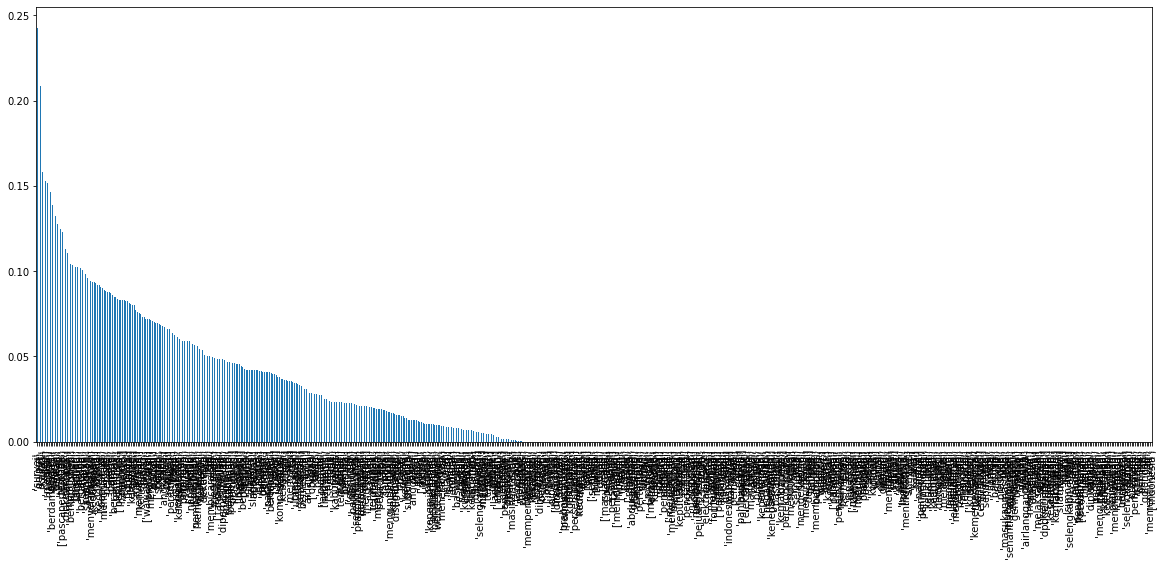

In [ ]:
#llet's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.feature_selection import SelectKBest

sel_best = SelectKBest(mutual_info_classif, k=50)
sel_best.fit(X_train, y_train)
X_train.columns[sel_best.get_support()]

Index([''dewan',', ''biaya',', ''id']', ''selengkapnya',', ''berani',',
       ''tasyi',', ''berdampak',', ''kemakmuran',', ''bogor',',
       ''kepemimpinan',', '['yan',', ''permenas',', ''fokus',', ''kandidat',',
       '['argumen',', ''membutuhkan',', '['kemhan',', ''berkomitmen',',
       ''produk',', ''warga',', ''terdampak',', ''terjaga',', ''tp',',
       ''pemilih',', ''produksi',', ''upaya',', '['perdamaian',', ''br',',
       ''pantun',', ''tugas',', ''keselamatan',', ''gembira',', ''pembinaan',',
       ''valid',', ''infinite',', ''asmara']', ''domestik',', ''singapura',',
       ''keputusannya',', ''indonesiaspanyol',', '['video',', ''angkanya',',
       ''baihaki',', ''oligarki']', ''ruwet',', '['ramalan',',
       ''abdurachman',', ''menyambut',', ''desak',', ''gerindra']'],
      dtype='object')

##**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
list_y_pred = []
for i in range(2,len(y_train)):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)
  y_pred = neigh.predict(X_test)
  list_y_pred2 = [i, y_pred] 
  list_y_pred.append(list_y_pred2)
list_y_pred

[[2, array(['kontra', 'kontra', 'kontra', 'kontra', 'kontra', 'kontra',
         'kontra', 'kontra', 'kontra', 'kontra', 'kontra', 'kontra',
         'kontra', 'kontra', 'kontra', 'kontra', 'kontra', 'kontra',
         'kontra', 'kontra', 'kontra', 'kontra', 'kontra', 'kontra',
         'kontra', 'kontra', 'kontra', 'kontra', 'kontra', 'kontra',
         'kontra'], dtype=object)],
 [3, array(['kontra', 'kontra', 'kontra', 'kontra', 'kontra', 'kontra',
         'kontra', 'kontra', 'kontra', 'kontra', 'kontra', 'kontra',
         'kontra', 'kontra', 'kontra', 'kontra', 'kontra', 'kontra',
         'kontra', 'kontra', 'kontra', 'kontra', 'kontra', 'kontra',
         'kontra', 'kontra', 'kontra', 'kontra', 'kontra', 'kontra',
         'kontra'], dtype=object)],
 [4, array(['pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro',
         'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro',
         'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro', 'pro',
         'pro

### **Akurasi**

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score

list_akurasi = []
for i in range(len(list_y_pred)):
  # print(list_pred[i])
  # testing = neigh.predict(X_test) 
  accuracy_neigh=round(accuracy_score(y_test,list_y_pred[i][1])* 100, 2)
  acc_neigh = round(neigh.score(X_train, y_train) * 100, 2)
  list_akurasi2 = [list_y_pred[i][0], accuracy_neigh]
  list_akurasi.append(list_akurasi2)
# list_akurasi

In [ ]:
df5 = pd.DataFrame(list_akurasi, columns=["Nearest Neighbors","Akurasi"])
df5

,Nearest Neighbors,Akurasi
0,2,45.16
1,3,45.16
2,4,54.84
3,5,54.84
4,6,54.84
...,...,...
63,65,54.84
64,66,54.84
65,67,54.84
66,68,54.84


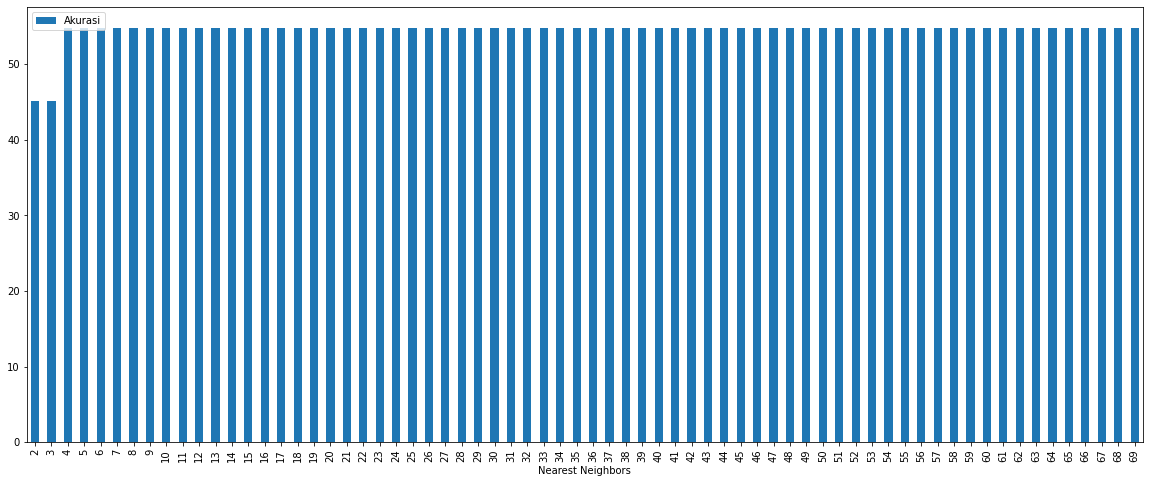

In [ ]:
df5.plot.bar(x='Nearest Neighbors',y='Akurasi',figsize=(20, 8))

## **KMeans**

### **Reduksi Dimensi PCA**

In [ ]:
from sklearn.decomposition import PCA
df_fcluster = df4.drop(labels=['label','tweet'], axis=1)
# df_fcluster
pca = PCA(n_components=1)
df_fcluster = pca.fit_transform(df_fcluster)
df_fclusters = pd.DataFrame(df_fcluster)
df_fclusters

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:595: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var.sum()


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
96,0.0
97,0.0
98,0.0
99,0.0


K-Means Clustering adalah suatu metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan unssupervised learning dan menggunakan metode yang mengelompokan data berbagai partisi.

K means clustering merupakan metode algoritma dasar, yang diterapkan sebagai berikut:

1. Menentukan jumlah cluster
2. Menentukan centroid awal
3. Menghitung jarak data dengan centroid
4. Menentukan anggota cluster
5. menghitung rata-rata centroid tiap cluster
6. Ulangi no 3-5 sampai data cluster tidak berubah

Rumus Euclidean Distance:

<img src="https://latex.codecogs.com/gif.latex?\left&space;[&space;\left&space;(&space;x,y&space;\right&space;),\left&space;(&space;a,b&space;\right&space;)&space;\right&space;]=\sqrt{\left&space;(&space;x-a&space;\right&space;)^{2}&plus;\left&space;(&space;y-b&space;\right&space;)^{2}}" title="\left [ \left ( x,y \right ),\left ( a,b \right ) \right ]=\sqrt{\left ( x-a \right )^{2}+\left ( y-b \right )^{2}}" /> 


In [ ]:
%%capture
from sklearn.cluster import KMeans

kmeans =KMeans(n_clusters=3)
kmeans=kmeans.fit(df_fclusters)
prediksi=kmeans.predict(df_fclusters)
centroids = kmeans.cluster_centers_

In [ ]:
centroid = pd.DataFrame(centroids)
centroid

,0,1
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0


In [ ]:
df_prediksi= pd.DataFrame(prediksi, columns=["Cluster"])
df_prediksi

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
96,0
97,0
98,0
99,0


# **Crawling Berita**

## **Install Library**

In [ ]:
%%capture
!pip install scrapy
!pip install pandas
!pip install scikit-learn
!pip install --user -U nltk

!pip install scipy
!pip install networkx

## **Menghapus File Lama**

In [ ]:
!rm -rf detik_scrape.py hasil.json && sleep 1

In [ ]:
def parse(self, response):
        a = ""
        for paragraf in response.xpath('//div[contains(@class,"clearfix")]/p/text()').getall():
          a = a+" "+str(paragraf)
        item = {
            'judul' : response.xpath('//h1[contains(@class,"read__title")]/text()').get(),
            'konten' : a
        }

        yield item

In [ ]:
%%writefile -a detik_scrape.py
import string
import scrapy
from scrapy import Request

#@markdown ---
#@markdown ### Masukkan url artikel detik.com :
artikel_url = "https://bola.kompas.com/read/2022/10/16/22362138/hasil-leeds-vs-arsenal-0-1-listrik-mengganggu-gunners-masih-nomor-1" #@param {type:"string"}
artikel_url = artikel_url+"?page=all"
#@markdown ---

class ptaUTM(scrapy.Spider):
    name = "Detik"
    start_urls = [
      artikel_url
      ]


    def parse(self, response):
        a = ""
        for paragraf in response.xpath('//div[contains(@class,"clearfix")]/p/text()').getall():
          a = a+" "+str(paragraf)
        item = {
            'judul' : response.xpath('//h1[contains(@class,"read__title")]/text()').get(),
            'konten' : a
        }

        yield item

Writing detik_scrape.py


## **Scrapy**

In [ ]:
# %%capture
!scrapy runspider detik_scrape.py -O hasil.json && sleep 2

2022-10-17 02:53:39 [scrapy.utils.log] INFO: Scrapy 2.6.3 started (bot: scrapybot)
2022-10-17 02:53:39 [scrapy.utils.log] INFO: Versions: lxml 4.9.1.0, libxml2 2.9.14, cssselect 1.1.0, parsel 1.6.0, w3lib 2.0.1, Twisted 22.8.0, Python 3.7.14 (default, Sep  8 2022, 00:06:44) - [GCC 7.5.0], pyOpenSSL 22.1.0 (OpenSSL 3.0.5 5 Jul 2022), cryptography 38.0.1, Platform Linux-5.10.133+-x86_64-with-Ubuntu-18.04-bionic
2022-10-17 02:53:39 [scrapy.crawler] INFO: Overridden settings:
{'SPIDER_LOADER_WARN_ONLY': True}
2022-10-17 02:53:39 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.epollreactor.EPollReactor
2022-10-17 02:53:39 [scrapy.extensions.telnet] INFO: Telnet Password: 8f7e3fccceea8c90
2022-10-17 02:53:39 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.feedexport.FeedExporter',
 'scrapy.extensions.logstats.LogStats']
2022-10-17 02:53:3

## **Hasil**

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.display.max_colwidth = None
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df_scrape = pd.read_json('hasil.json')
df_scrape

,judul,konten
0,"Hasil Leeds Vs Arsenal 0-1: Listrik Mengganggu, Gunners Masih Nomor 1","- Gol semata wayang mengantar menang 1-0 di markas Leeds United. Arsenal pun sukses mengamankan posisi di puncak klasemen Liga Inggris 2022-2023. Laga pekan ke-11 Premier League alias Liga Inggris 2022-2023 antara yang mentas di Elland Road, Minggu (16/10/2022), langsung diwarnai cerita meski baru berlangsung sekitar 23 detik. Wasit Chris Kavanagh terpaksa menghentikan laga Leeds vs Arsenal karena menemui masalah pada alat komunikasinya. Problem pada sang wasit merupakan buntut dari masalah kelistrikan di Stadion Elland Road. Wartawan Sky Sports, Keith Downie, menyebut ada pemadaman listrik lokal di seputaran Elland Road. Alhasil, wasit pun tak punya akses kepada teknologi Hawkeye dan VAR (Video Assistant Referee) yang krusial dalam menunjang kinerja mereka. Wasit kemudian memutuskan bahwa pertandingan ditunda sementara, sekitar 40 menit. Duel Leeds vs Arsenal akhirnya baru dimulai lagi pada jam 14.40 waktu setempat atau 20.40 WIB. Masalah listrik pada awal laga nyatanya tak mengganggu momentum Arsenal yang terus mampu menjaga tren positif mereka di Liga Inggris 2022-2023. Arsenal menekuk tuan rumah Leeds berkat gol Bukayo Saka pada menit ke-35. Gol Saka berawal dari keteledoran pemain Leeds, Rodrigo, dalam melepas operan lambung menyilang. Bola operan Rodrigo justru sampai ke kaki Saka yang berdiri sisi kiri pertahanan Leeds. Usai bekerja sama dengan Martin Odegaard, Saka melepaskan sepakan dari sudut sempit yang gagal dihalau Illan Meslier. Dominasi Arsenal meluntur pada babak kedua. Bahkan, tuan rumah Leeds sudah bisa menggetarkan jala gawang Arsenal semenit setelah turun minum. Cuma, gol Patrick Bamford dianulir karena dirinya lebih dulu melakukan pelanggaran sebelum membuat penyelesaian. Bamford lagi-lagi harus gigit jari pada menit ke-64 ketika melihat eksekusi penaltinya melebar dari gawang Arsenal. Kans menendang dari titik putih diberikan untuk Leeds setelah wasit Chris Kavanagh melakukan tinjauan VAR yang menegaskan William Saliba menyentuh bola dengan tangan. Leeds yang mengurung Arsenal pada babak kedua pada akhirnya tak mendapatkan apa-apa dan menderita kekalahan kandang pertama musim ini. Arsenal pun sukses memenangi sembilan dari 10 partai pertama mereka di Premier League musim ini. Statistik yang bisa menebalkan kepercayaan diri The Gunners. Sebab, empat tim terakhir yang melakukan itu, yakni Chelsea (2005-2006), Man City (2011-2012 dan 2017-2018), serta Liverpool 2019-2020 mampu melaju dan mengakhiri musim sebagai juara. LEEDS vs 0-1 1-Meslier; 25-Kristensen, 5-Koch, 6-Cooper, 21-Struijk; 12-Adams, 8-Marc Roca (10-Summerville 84'); 23-Sinisterra, 7-Aaronson, 11-Harrison (43-Klich 76'); 19-Rodrigo (9-Bamford 46'). 13-Klaesson, 2-Ayling, 3-Firpo, 14-Llorente, 30-Gelhardt, 42-Greenwood. Jesse Marsch. 1-Ramsdale; 4-White (3-Tierney 76'), 12-Saliba, 6-Gabriel, 18-Tomiyasu; 5-Partey, 34-Xhaka; 7-Saka (16-Holding 82'), 8-Odegaard (21-Fabio Vieira 73'), 11-Martinelli; 9-Gabriel Jesus (14-Nketiah 82'). 30-Turner, 17-Cedric, 23-Sambi Lokonga, 24-Nelson, 27-Marquinhos. Mikel Arteta. Dapatkan informasi dan insight pilihan redaksi Kompas.com"


## **Prepocessing**

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

df_pisahkalimat = df_scrape.copy()
df_pisahkalimat ["konten"][0] = sent_tokenize(df_pisahkalimat["konten"][0])

df_pisahkalimat = pd.DataFrame(df_pisahkalimat["konten"][0], columns=["kalimat"])
df_pisahkalimat

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,kalimat
0,- Gol semata wayang mengantar menang 1-0 di markas Leeds United.
1,Arsenal pun sukses mengamankan posisi di puncak klasemen Liga Inggris 2022-2023.
2,"Laga pekan ke-11 Premier League alias Liga Inggris 2022-2023 antara yang mentas di Elland Road, Minggu (16/10/2022), langsung diwarnai cerita meski baru berlangsung sekitar 23 detik."
3,Wasit Chris Kavanagh terpaksa menghentikan laga Leeds vs Arsenal karena menemui masalah pada alat komunikasinya.
4,Problem pada sang wasit merupakan buntut dari masalah kelistrikan di Stadion Elland Road.
5,"Wartawan Sky Sports, Keith Downie, menyebut ada pemadaman listrik lokal di seputaran Elland Road."
6,"Alhasil, wasit pun tak punya akses kepada teknologi Hawkeye dan VAR (Video Assistant Referee) yang krusial dalam menunjang kinerja mereka."
7,"Wasit kemudian memutuskan bahwa pertandingan ditunda sementara, sekitar 40 menit."
8,Duel Leeds vs Arsenal akhirnya baru dimulai lagi pada jam 14.40 waktu setempat atau 20.40 WIB.
9,Masalah listrik pada awal laga nyatanya tak mengganggu momentum Arsenal yang terus mampu menjaga tren positif mereka di Liga Inggris 2022-2023.


### **Case Folding**

In [ ]:
import string
df_casefolding = df_pisahkalimat.copy()
#mengubah menjadi huruf kecil
df_casefolding['kalimat'] = df_casefolding['kalimat'].str.lower()

#menghapus tanda baca
tanda_baca = string.punctuation
tanda_baca = tanda_baca+"–"
for char in tanda_baca:
    df_casefolding['kalimat'] = df_casefolding['kalimat'].replace(r'[\%s]'%char," ", regex=True)

#menghapus angka
df_casefolding['kalimat'] = df_casefolding['kalimat'].replace(r'\d+',' ', regex=True)

#menghapus karakter kosong
df_casefolding['kalimat'] = df_casefolding['kalimat'].replace(r'\s+',' ', regex=True)
df_casefolding.head(5)

,kalimat
0,gol semata wayang mengantar menang di markas leeds united
1,arsenal pun sukses mengamankan posisi di puncak klasemen liga inggris
2,laga pekan ke premier league alias liga inggris antara yang mentas di elland road minggu langsung diwarnai cerita meski baru berlangsung sekitar detik
3,wasit chris kavanagh terpaksa menghentikan laga leeds vs arsenal karena menemui masalah pada alat komunikasinya
4,problem pada sang wasit merupakan buntut dari masalah kelistrikan di stadion elland road


### **Stopword**

In [ ]:
import urllib.request, json
df_stopwords = df_casefolding.copy() 
with urllib.request.urlopen("https://raw.githubusercontent.com/smilesense/stopwords-id/master/stopwords-id.json") as list_stopwords:
    data_stopword = json.load(list_stopwords)

for i in data_stopword:
    df_stopwords['kalimat'] = df_stopwords['kalimat'].replace(r'\b%s\b'%i, '', regex=True)
df_stopwords['kalimat'] = df_stopwords['kalimat'].replace(r'\s+',' ', regex=True)

df_stopwords.head(5)

,kalimat
0,gol wayang mengantar menang markas leeds united
1,arsenal sukses mengamankan posisi puncak klasemen liga inggris
2,laga pekan premier league alias liga inggris mentas elland road minggu langsung diwarnai cerita detik
3,wasit chris kavanagh terpaksa menghentikan laga leeds vs arsenal menemui alat komunikasinya
4,problem sang wasit buntut kelistrikan stadion elland road


## **Vectorization**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv_matrix = cv.fit_transform(df_casefolding['kalimat'])
print ("Banyaknya kosa kata = ", len((cv.get_feature_names_out())))
print ("kosa kata = ", (cv.get_feature_names_out()))

Banyaknya kosa kata =  273
kosa kata =  ['aaronson' 'ada' 'adams' 'akhirnya' 'akses' 'alat' 'alhasil' 'alias'
 'antara' 'apa' 'arsenal' 'arteta' 'assistant' 'atau' 'awal' 'ayling'
 'babak' 'bahkan' 'bahwa' 'bamford' 'baru' 'bekerja' 'berawal' 'berdiri'
 'berkat' 'berlangsung' 'bisa' 'bola' 'bukayo' 'buntut' 'cedric' 'cerita'
 'chelsea' 'chris' 'city' 'com' 'cooper' 'cuma' 'dalam' 'dan' 'dapatkan'
 'dari' 'dengan' 'detik' 'di' 'dianulir' 'diberikan' 'dihalau' 'dimulai'
 'diri' 'dirinya' 'ditunda' 'diwarnai' 'dominasi' 'downie' 'duel' 'dulu'
 'eksekusi' 'elland' 'empat' 'fabio' 'firpo' 'gabriel' 'gagal' 'gawang'
 'gelhardt' 'gigit' 'gol' 'greenwood' 'gunners' 'harrison' 'harus'
 'hawkeye' 'holding' 'illan' 'informasi' 'inggris' 'ini' 'insight' 'itu'
 'jala' 'jam' 'jari' 'jesse' 'jesus' 'juara' 'justru' 'kaki' 'kandang'
 'kans' 'karena' 'kavanagh' 'ke' 'kedua' 'keith' 'kekalahan' 'kelistrikan'
 'kemudian' 'kepada' 'kepercayaan' 'keteledoran' 'ketika' 'kinerja' 'kiri'
 'klaesson' 'klasemen

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())
print(normal_matrix.T.toarray)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.13144322]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
<bound method _cs_matrix.toarray of <273x30 sparse matrix of type '<class 'numpy.float64'>'
	with 393 stored elements in Compressed Sparse Column format>>


## **CosineSimilarity**

In [ ]:
import numpy as np
vektorkalimat=normal_matrix.toarray()
A=vektorkalimat[0]
B=vektorkalimat[1]
dot = np.dot(A, B)
norma = np.linalg.norm(A)
normb = np.linalg.norm(A)
cos = dot / (norma * normb)
cos

0.05375526916931975

## **Graph**

In [ ]:
import networkx as nx
res_graph = normal_matrix * normal_matrix.T
print(res_graph)

  (0, 20)	0.04625432487523684
  (0, 9)	0.03802375854203431
  (0, 5)	0.04154833799049403
  (0, 4)	0.047234087661956775
  (0, 2)	0.03391361391728634
  (0, 1)	0.05375526916931975
  (0, 16)	0.059380142821154204
  (0, 23)	0.02830586713043562
  (0, 19)	0.026491109848695293
  (0, 18)	0.025359538556793976
  (0, 15)	0.032321813371309925
  (0, 12)	0.03323021354125225
  (0, 11)	0.10135088112187253
  (0, 10)	0.11479387636737028
  (0, 8)	0.03314685956439264
  (0, 3)	0.03341160973633267
  (0, 0)	1.0000000000000002
  (1, 19)	0.026105552987124896
  (1, 17)	0.027999786145075953
  (1, 15)	0.03185139529540133
  (1, 14)	0.052586287806575566
  (1, 10)	0.038682033120036534
  (1, 8)	0.03266443360271888
  (1, 3)	0.03292533054820006
  (1, 5)	0.04094363524717466
  :	:
  (23, 19)	0.018382636048230382
  (23, 18)	0.01759741929663127
  (23, 15)	0.02242866135156959
  (23, 10)	0.027238562492888946
  (23, 0)	0.02830586713043562
  (23, 13)	0.05347910091893982
  (23, 12)	0.07472305916733826
  (23, 11)	0.0779303932130771

In [ ]:
nx_graph = nx.from_scipy_sparse_matrix(res_graph)

In [ ]:
print('Banyaknya sisi {}'.format(nx_graph.number_of_edges()))

Banyaknya sisi 213


## **Page Rank**

In [ ]:
ranks = nx.pagerank(nx_graph)
ranks

{0: 0.03070843637144739,
 1: 0.033443007371691126,
 2: 0.035750860757202615,
 3: 0.03951540235502335,
 4: 0.036715914645018694,
 5: 0.02750589155948044,
 6: 0.032521149093829596,
 7: 0.0270770517860237,
 8: 0.03453637448492946,
 9: 0.040317565016264725,
 10: 0.04415520728423537,
 11: 0.035142081506962984,
 12: 0.03444739999906083,
 13: 0.03061152484099299,
 14: 0.03231020721815317,
 15: 0.03187419862427246,
 16: 0.027687577611425877,
 17: 0.0354955973582644,
 18: 0.035572635823959364,
 19: 0.04229850373021833,
 20: 0.03786949829745302,
 21: 0.027255199180611107,
 22: 0.030142163582388137,
 23: 0.02890272367345239,
 24: 0.03333333333333333,
 25: 0.03333333333333333,
 26: 0.02719357771219365,
 27: 0.03333333333333333,
 28: 0.03333333333333333,
 29: 0.027616916782111325}

In [ ]:
#@title Persentase Ringkasan
#@markdown ---
#@markdown ### Tentukan persentase ringkasan : total kalimat:
persentase_ringkasan = 50 #@param {type:"slider", min:50, max:90, step:10}
#@markdown ---

In [ ]:
top_sentence={sentence:ranks[index] for index,sentence in enumerate(df_pisahkalimat["kalimat"].values)}

persentase = len(df_pisahkalimat["kalimat"])*persentase_ringkasan//100
print("Jumlah Kalimat pada Ringkasan : ",persentase)
top=dict(sorted(top_sentence.items(), key=lambda x: x[1], reverse=True)[:persentase])

Jumlah Kalimat pada Ringkasan :  15


## **Hasil**

In [ ]:
ringkasan = ""
for sent in df_pisahkalimat["kalimat"].values:
    if sent in top.keys():
        ringkasan = ringkasan+" "+sent
ringkasan

' Arsenal pun sukses mengamankan posisi di puncak klasemen Liga Inggris 2022-2023. Laga pekan ke-11 Premier League alias Liga Inggris 2022-2023 antara   yang mentas di Elland Road, Minggu (16/10/2022), langsung diwarnai cerita meski baru berlangsung sekitar 23 detik. Wasit Chris Kavanagh terpaksa menghentikan laga Leeds vs Arsenal karena menemui masalah pada alat komunikasinya. Problem pada   sang wasit merupakan buntut dari masalah kelistrikan di Stadion Elland Road. Duel Leeds vs Arsenal akhirnya baru dimulai lagi pada jam 14.40 waktu setempat atau 20.40 WIB. Masalah listrik pada awal laga nyatanya tak mengganggu momentum Arsenal yang terus mampu menjaga tren positif mereka di Liga Inggris 2022-2023. Arsenal menekuk tuan rumah Leeds berkat gol Bukayo Saka pada menit ke-35. Gol Saka berawal dari keteledoran pemain Leeds, Rodrigo, dalam melepas operan lambung menyilang. Bola operan Rodrigo justru sampai ke kaki Saka yang berdiri sisi kiri pertahanan Leeds. Bamford lagi-lagi harus gigit